In [12]:
import matplotlib.pyplot as plt
from full_fft_2d import FullFFT2D
from axis_fft_2d import AxisFFT2D
from tile_fft_2d import TileFFT2D
import cv2
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import numpy as np

In [13]:
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
corrupted_x, corrupted_y, width, height = 50, 50, 20, 20

In [14]:
full_model = FullFFT2D().fit(img)
reconstructed_full = full_model.predict(corrupted_x, corrupted_y, width, height)
axis_model = AxisFFT2D().fit(img)
reconstructed_axis = axis_model.predict(corrupted_x, corrupted_y, width, height)
tile_model = TileFFT2D().fit(img)
reconstructed_tile = tile_model.predict(corrupted_x, corrupted_y, width, height)

In [15]:
reconstructed_axis.shape

(20, 20)

In [16]:
def mse(imageA, imageB):
    return mean_squared_error(imageA, imageB)

def mae(imageA, imageB):
    return np.mean(np.abs(imageA - imageB))

def ssim(imageA, imageB):
    return structural_similarity(imageA, imageB, data_range=imageB.max() - imageB.min())

def psnr(imageA, imageB):
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')  # No error.
    data_range = np.max([imageA.max(), imageB.max()]) - np.min([imageA.min(), imageB.min()])
    return 20 * np.log10(data_range / np.sqrt(mse_value))


In [17]:
metrics_part = {}
corrupted = img[corrupted_y:corrupted_y+height,corrupted_x:corrupted_x+width]
images_parts = [reconstructed_full,reconstructed_axis,reconstructed_tile]
methods = ['Full','Axis', 'Tile']

for method, image in zip(methods, images_parts):
    metrics_part[method] = {
        'MSE': mse(corrupted, image),
        'MAE': mae(corrupted, image),
        'SSIM': ssim(corrupted, image),
        'PSNR': psnr(corrupted, image)
    }

# Print metrics for review
for method, scores in metrics_part.items():
    print(f"{method} Metrics:")
    for score_name, score_value in scores.items():
        print(f"  {score_name}: {score_value:.4f}")
    print("\n")

Full Metrics:
  MSE: 22.4050
  MAE: 3.6950
  SSIM: 0.0301
  PSNR: 15.4397


Axis Metrics:
  MSE: 26.1000
  MAE: 4.0450
  SSIM: -0.1018
  PSNR: 14.7768


Tile Metrics:
  MSE: 16.1600
  MAE: 3.0800
  SSIM: 0.0138
  PSNR: 16.8587




C:\Users\Alex\AppData\Local\Temp\ipykernel_26864\328634812.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_26864\328634812.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_26864\328634812.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_26864\328634812.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)


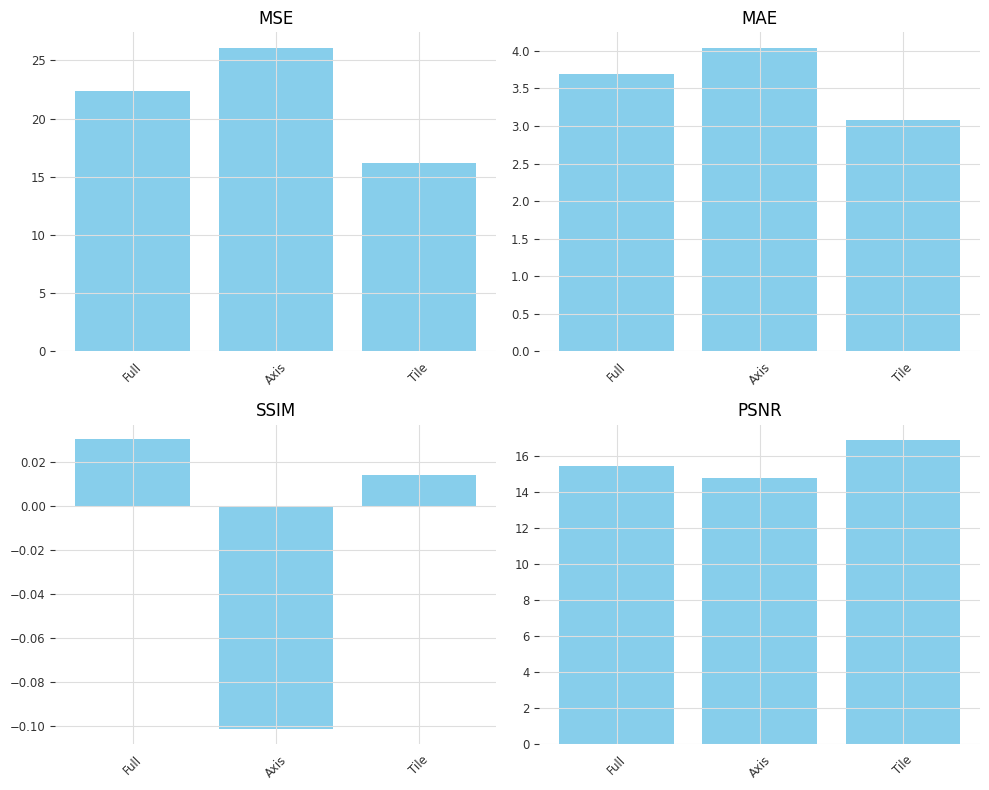

In [18]:
import matplotlib.pyplot as plt

# Setup plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.ravel()
metrics_names = ['MSE', 'MAE', 'SSIM', 'PSNR']

# Plot each metric
for i, metric in enumerate(metrics_names):
    values = [metrics_part[method][metric] for method in methods]
    axes[i].bar(methods, values, color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_xticklabels(methods, rotation=45)

plt.tight_layout()
plt.show()

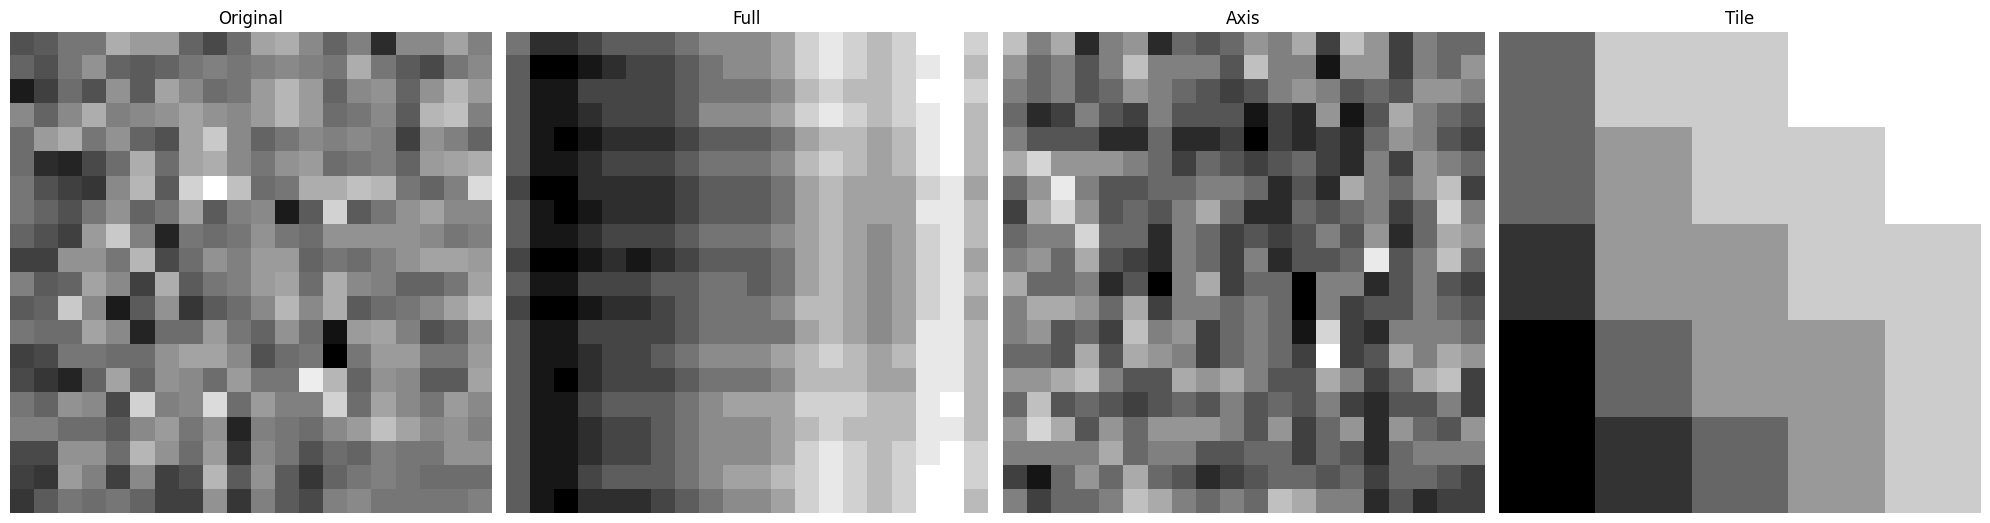

In [23]:
n = len(images_parts) + 1  # Number of images plus one for the original
fig, axs = plt.subplots(1, n, figsize=(n * 5, 10))  # Adjust size as needed

# Plot original image
axs[0].imshow(corrupted, cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off axis

# Plot each method's image
for i, (image, method) in enumerate(zip(images_parts, methods), start=1):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(method)
    axs[i].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

In [20]:
img_full = img.copy()
img_full[corrupted_y:corrupted_y+height,corrupted_x:corrupted_x+width] = reconstructed_full
img_axis = img.copy()
img_axis[corrupted_y:corrupted_y+height,corrupted_x:corrupted_x+width] = reconstructed_axis
img_tile = img.copy()
img_tile[corrupted_y:corrupted_y+height,corrupted_x:corrupted_x+width] = reconstructed_tile

In [21]:
metrics_full = {}
images = [img_full,img_axis,img_tile]
methods = ['Full','Axis', 'Tile']

for method, image in zip(methods, images):
    metrics_full[method] = {
        'MSE': mse(img, image),
        'MAE': mae(img, image),
        'SSIM': ssim(img, image),
        'PSNR': psnr(img, image)
    }

# Print metrics for review
for method, scores in metrics_full.items():
    print(f"{method} Metrics:")
    for score_name, score_value in scores.items():
        print(f"  {score_name}: {score_value:.4f}")
    print("\n")

Full Metrics:
  MSE: 0.0342
  MAE: 0.1413
  SSIM: 0.9996
  PSNR: 61.8959


Axis Metrics:
  MSE: 0.0398
  MAE: 0.1204
  SSIM: 0.9995
  PSNR: 61.2330


Tile Metrics:
  MSE: 0.0247
  MAE: 0.1523
  SSIM: 0.9996
  PSNR: 63.3149




C:\Users\Alex\AppData\Local\Temp\ipykernel_26864\4286094497.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_26864\4286094497.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_26864\4286094497.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_26864\4286094497.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)


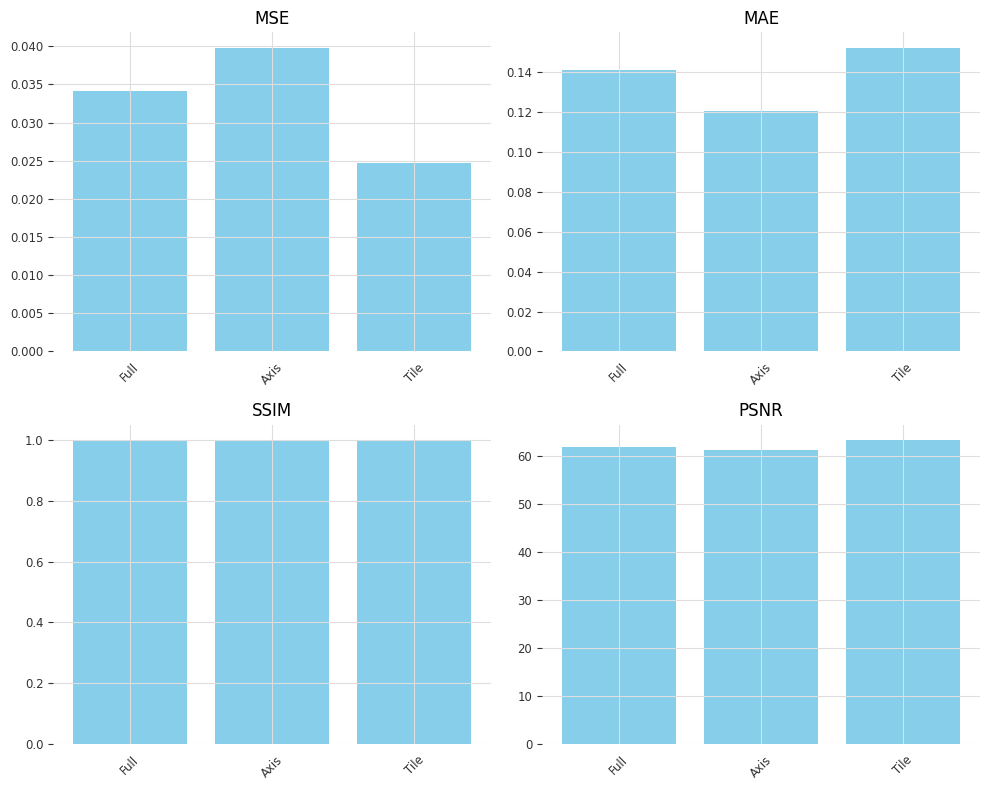

In [22]:
import matplotlib.pyplot as plt

# Setup plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.ravel()
metrics_names = ['MSE', 'MAE', 'SSIM', 'PSNR']

# Plot each metric
for i, metric in enumerate(metrics_names):
    values = [metrics_full[method][metric] for method in methods]
    axes[i].bar(methods, values, color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_xticklabels(methods, rotation=45)

plt.tight_layout()
plt.show()